In [1]:
# Importing necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import statistics 
import plotly.graph_objects as go  
from plotly.subplots import make_subplots 
import plotly.figure_factory as ff 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import warnings

# Ignoring all warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Datasets



In [3]:
# Reading first thyroid dataset
data1 = pd.read_csv('/content/drive/MyDrive/IE7275_Data_Mining_Files/Project/Data/Thyroid_Disease_Data/thyroid0387.data', sep = ',', header = None)
data1.shape

(9172, 30)

In [4]:
# Reading second thyroid dataset
data2 = pd.read_csv('/content/drive/MyDrive/IE7275_Data_Mining_Files/Project/Data/Thyroid_Disease_Data/allhyper.data', sep = ',', header = None)
data2.shape

(2800, 30)

In [5]:
# Reading third thyroid dataset
data3 = pd.read_csv('/content/drive/MyDrive/IE7275_Data_Mining_Files/Project/Data/Thyroid_Disease_Data/allhypo.data', sep = ',', header = None)
data3.shape

(2800, 30)

In [6]:
# Making a list of column names to set these for the data read above 
cols = ['Age', 'Sex', 'On_Thyroxine', 'Query_On_Thyroxine', 'On_Antithyroid_Medication', 'Sick', 'Pregnant', 'Thyroid_Surgery', 
        'I131_Treatment', 'Query_Hypothyroid', 'Query_Hyperthyroid', 'Lithium', 'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH_Measured', 
        'TSH', 'T3_measured', 'T3', 'TT4_Measured', 'TT4', 'T4U_Measured', 'T4U', 'FTI_Measured', 'FTI', 'TBG_Measured', 'TBG', 
        'Referral_Source', 'Classes']

In [7]:
# Setting column names for all datasets
data1.columns = cols
data2.columns = cols 
data3.columns = cols 

In [8]:
# Concatenating three datasets into one 
thyroid_data = pd.concat([data1, data2, data3], ignore_index = True)
thyroid_data.head()

,Age,Sex,On_Thyroxine,Query_On_Thyroxine,On_Antithyroid_Medication,Sick,Pregnant,Thyroid_Surgery,I131_Treatment,Query_Hypothyroid,...,TT4_Measured,TT4,T4U_Measured,T4U,FTI_Measured,FTI,TBG_Measured,TBG,Referral_Source,Classes
0,29,F,f,f,f,f,f,f,f,t,...,f,?,f,?,f,?,f,?,other,-[840801013]
1,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
2,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
3,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
4,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]


In [9]:
thyroid_data.shape

(14772, 30)

In [10]:
thyroid_data.to_csv('thyroid_data.csv')

### Data Preprocessing

In [11]:
# Separating patient ID from thyroid class in 'Classes' column
thyroid_data['Classes'] = thyroid_data['Classes'].str.replace('.', '[')

# Creating separate columns for class and patient ID by splitting
thyroid_data[['Class', 'Patient_ID']] = thyroid_data['Classes'].str.split('[', expand = True)

In [12]:
# Dropping some columns
thyroid_data.drop(['Classes'], axis = 1, inplace = True)
thyroid_data.drop(['Referral_Source'], axis = 1, inplace = True)
thyroid_data.drop(['Patient_ID'], axis = 1, inplace = True)

In [13]:
# Checking unique values of the class column
thyroid_data['Class'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E', 'negative',
       'hyperthyroid', 'T3 toxic', 'goitre', 'compensated hypothyroid',
       'primary hypothyroid', 'secondary hypothyroid'], dtype=object)

In [14]:
# Filtering out values that do not exist in the target class list
class_lst = ['-', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
thyroid_data = thyroid_data[thyroid_data['Class'].isin(class_lst)]

In [15]:
# Cleaning class column by making all values consistent across all categories of thyroid disorders
thyroid_data['Class'].replace('-', 'negative', inplace = True)
thyroid_data['Class'].replace('A', 'hyperthyroid', inplace = True)
thyroid_data['Class'].replace('B', 'T3 toxic', inplace = True)
thyroid_data['Class'].replace('C', 'toxic goitre', inplace = True)
thyroid_data['Class'].replace('D', 'secondary toxic', inplace = True)
thyroid_data['Class'].replace('E', 'hypothyroid', inplace = True)
thyroid_data['Class'].replace('F', 'primary hypothyroid', inplace = True)
thyroid_data['Class'].replace('G', 'compensated hypothyroid', inplace = True)
thyroid_data['Class'].replace('H', 'secondary hypothyroid', inplace = True)

In [16]:
# Unique values in class column after replacement
thyroid_data['Class'].unique()

array(['negative', 'primary hypothyroid', 'compensated hypothyroid',
       'hyperthyroid', 'secondary toxic', 'T3 toxic', 'toxic goitre',
       'hypothyroid'], dtype=object)

In [17]:
# Dimensions of the new dataset
thyroid_data.shape

(7546, 29)

In [18]:
# How many '?' do we have in all columns? 
thyroid_data.eq('?').sum()

Age                             0
Sex                           250
On_Thyroxine                    0
Query_On_Thyroxine              0
On_Antithyroid_Medication       0
Sick                            0
Pregnant                        0
Thyroid_Surgery                 0
I131_Treatment                  0
Query_Hypothyroid               0
Query_Hyperthyroid              0
Lithium                         0
Goitre                          0
Tumor                           0
Hypopituitary                   0
Psych                           0
TSH_Measured                    0
TSH                           722
T3_measured                     0
T3                           2209
TT4_Measured                    0
TT4                           354
T4U_Measured                    0
T4U                           676
FTI_Measured                    0
FTI                           669
TBG_Measured                    0
TBG                          7287
Class                           0
dtype: int64

In [19]:
# How many rows with all '?' values?
thyroid_data.eq('?').all()

Age                          False
Sex                          False
On_Thyroxine                 False
Query_On_Thyroxine           False
On_Antithyroid_Medication    False
Sick                         False
Pregnant                     False
Thyroid_Surgery              False
I131_Treatment               False
Query_Hypothyroid            False
Query_Hyperthyroid           False
Lithium                      False
Goitre                       False
Tumor                        False
Hypopituitary                False
Psych                        False
TSH_Measured                 False
TSH                          False
T3_measured                  False
T3                           False
TT4_Measured                 False
TT4                          False
T4U_Measured                 False
T4U                          False
FTI_Measured                 False
FTI                          False
TBG_Measured                 False
TBG                          False
Class               

In [20]:
# Number of NaN values in each column
thyroid_data.isna().sum()

Age                          0
Sex                          0
On_Thyroxine                 0
Query_On_Thyroxine           0
On_Antithyroid_Medication    0
Sick                         0
Pregnant                     0
Thyroid_Surgery              0
I131_Treatment               0
Query_Hypothyroid            0
Query_Hyperthyroid           0
Lithium                      0
Goitre                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH_Measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_Measured                 0
TT4                          0
T4U_Measured                 0
T4U                          0
FTI_Measured                 0
FTI                          0
TBG_Measured                 0
TBG                          0
Class                        0
dtype: int64

In [21]:
# Imputing '?' values in sex column by the most commonly occurring value 
sex_mode = statistics.mode(thyroid_data['Sex'])
thyroid_data['Sex'].replace('?', sex_mode, inplace = True)

In [22]:
# Looking for inconsistent values in age column
thyroid_data['Age'].unique()

# Based on unique values, creating a list of incorrect age values
age_lst = [455, 65511, 65512, 65526]
thyroid_data = thyroid_data[~thyroid_data['Age'].isin(age_lst)]

In [23]:
# For missing values in T3, TT4, T4U, TSH, and TBG columns, we can impute 0 based on their measured values. 
thyroid_data['T3'].replace('?', 0, inplace = True)
thyroid_data['TT4'].replace('?', 0, inplace = True)
thyroid_data['T4U'].replace('?', 0, inplace = True)
thyroid_data['FTI'].replace('?', 0, inplace = True)
thyroid_data['TBG'].replace('?', 0, inplace = True)
thyroid_data['TSH'].replace('?', 0, inplace = True)

In [24]:
# Checking datatypes of all columns 
thyroid_data.dtypes

Age                          object
Sex                          object
On_Thyroxine                 object
Query_On_Thyroxine           object
On_Antithyroid_Medication    object
Sick                         object
Pregnant                     object
Thyroid_Surgery              object
I131_Treatment               object
Query_Hypothyroid            object
Query_Hyperthyroid           object
Lithium                      object
Goitre                       object
Tumor                        object
Hypopituitary                object
Psych                        object
TSH_Measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_Measured                 object
TT4                          object
T4U_Measured                 object
T4U                          object
FTI_Measured                 object
FTI                          object
TBG_Measured                 object
TBG                         

In [25]:
# Converting numerical columns from dtype object to int 
thyroid_data['Age'] = thyroid_data['Age'].astype('int')
thyroid_data['TSH'] = thyroid_data['TSH'].astype('float')
thyroid_data['T3'] = thyroid_data['T3'].astype('float')
thyroid_data['TT4'] = thyroid_data['TT4'].astype('float')
thyroid_data['T4U'] = thyroid_data['T4U'].astype('float')
thyroid_data['FTI'] = thyroid_data['FTI'].astype('float')
thyroid_data['TBG'] = thyroid_data['TBG'].astype('float')

In [26]:
# Checking datatypes after conversion
thyroid_data.dtypes

Age                            int64
Sex                           object
On_Thyroxine                  object
Query_On_Thyroxine            object
On_Antithyroid_Medication     object
Sick                          object
Pregnant                      object
Thyroid_Surgery               object
I131_Treatment                object
Query_Hypothyroid             object
Query_Hyperthyroid            object
Lithium                       object
Goitre                        object
Tumor                         object
Hypopituitary                 object
Psych                         object
TSH_Measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_Measured                  object
TT4                          float64
T4U_Measured                  object
T4U                          float64
FTI_Measured                  object
FTI                          float64
TBG_Measured                  object
T

In [27]:
# Merging all hyperthyroid subclasses into hyperthyroid class. Similarly, for hypothyroid subclasses
thyroid_data['Class'].replace('T3 toxic', 'hyperthyroid', inplace = True)
thyroid_data['Class'].replace('toxic goitre', 'hyperthyroid', inplace = True)
thyroid_data['Class'].replace('secondary toxic', 'hyperthyroid', inplace = True)
thyroid_data['Class'].replace('primary hypothyroid', 'hypothyroid', inplace = True)
thyroid_data['Class'].replace('secondary hypothyroid', 'hypothyroid', inplace = True)
thyroid_data['Class'].replace('compensated hypothyroid', 'hypothyroid', inplace = True)
thyroid_data['Class'].unique()

array(['negative', 'hypothyroid', 'hyperthyroid'], dtype=object)

In [28]:
# Grouping by to get the count of each class in the target variable
thyroid_data.groupby(['Class'])['Class'].count()

Class
hyperthyroid     182
hypothyroid      593
negative        6767
Name: Class, dtype: int64

In [29]:
# Performing label encoder to encode categorical target values to numerical target values
le = LabelEncoder()
thyroid_data['Class'] = le.fit_transform(thyroid_data['Class'])

In [30]:
# Label Encoding converted the target variable to 0 (hyperthyroid), 1 (hypothyroid), and 2 (negative) 

In [31]:
# Getting numerical and categorical columns
num_cols = ['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
cat_cols = ['Sex', 'On_Thyroxine', 'Query_On_Thyroxine', 'On_Antithyroid_Medication', 'Sick', 'Pregnant', 'Thyroid_Surgery',
            'I131_Treatment', 'Query_Hypothyroid', 'Query_Hyperthyroid', 'Lithium', 'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 
            'TSH_Measured', 'T3_measured', 'TT4_Measured', 'T4U_Measured', 'FTI_Measured', 'TBG_Measured']

# Creating a column tranformer to implement one hot encoding and normalization
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_cols), 
        ('cat', OneHotEncoder(), cat_cols)
    ])

# Fitting the column tranformer on original data 
processed_data = preprocessor.fit_transform(thyroid_data)

# Creating a new dataframe with the processed data
processed_df = pd.DataFrame(
    processed_data,
    columns = num_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols))
)

In [32]:
processed_df.head()

,Age,TSH,T3,TT4,T4U,FTI,TBG,Sex_F,Sex_M,On_Thyroxine_f,...,T3_measured_f,T3_measured_t,TT4_Measured_f,TT4_Measured_t,T4U_Measured_f,T4U_Measured_t,FTI_Measured_f,FTI_Measured_t,TBG_Measured_f,TBG_Measured_t
0,-1.231760,-0.185266,-1.248935,-2.581264,-2.780032,-2.143621,-0.182088,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-1.231760,-0.132967,0.411433,0.714243,-2.780032,-2.143621,-0.182088,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.587260,-0.197335,-1.248935,-2.581264,-2.780032,-2.143621,2.358791,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,-0.855801,-0.197335,-1.248935,-2.581264,-2.780032,-2.143621,5.823627,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.433199,-0.197335,-1.248935,-2.581264,-2.780032,-2.143621,5.823627,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [33]:
processed_df.shape

(7542, 48)

### Data Exploration & Visualization

In [34]:
# Understanding statistics of the values in columns 

thyroid_data.describe(include = 'all')

,Age,Sex,On_Thyroxine,Query_On_Thyroxine,On_Antithyroid_Medication,Sick,Pregnant,Thyroid_Surgery,I131_Treatment,Query_Hypothyroid,...,T3,TT4_Measured,TT4,T4U_Measured,T4U,FTI_Measured,FTI,TBG_Measured,TBG,Class
count,7542.000000,7542,7542,7542,7542,7542,7542,7542,7542,7542,...,7542.000000,7542,7542.000000,7542,7542.000000,7542,7542.000000,7542,7542.000000,7542.000000
unique,NaN,2,2,2,2,2,2,2,2,2,...,NaN,2,NaN,2,NaN,2,NaN,2,NaN,NaN
top,NaN,F,f,f,f,f,f,f,f,f,...,NaN,t,NaN,t,NaN,t,NaN,f,NaN,NaN
freq,NaN,5148,6695,7419,7450,7262,7509,7436,7402,7042,...,NaN,7188,NaN,6866,NaN,6873,NaN,7283,NaN,NaN
mean,51.934235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.429187,NaN,100.258242,NaN,0.880593,NaN,100.759996,NaN,0.788299,1.873111
std,18.620319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.144401,NaN,38.843337,NaN,0.316777,NaN,47.007687,NaN,4.329497,0.398839
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
25%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,84.250000,NaN,0.830000,NaN,88.000000,NaN,0.000000,2.000000
50%,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.700000,NaN,101.000000,NaN,0.950000,NaN,105.000000,NaN,0.000000,2.000000
75%,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.200000,NaN,120.000000,NaN,1.050000,NaN,123.000000,NaN,0.000000,2.000000


Text(0.5, 1.0, 'Correlation Between Numerical Variables')

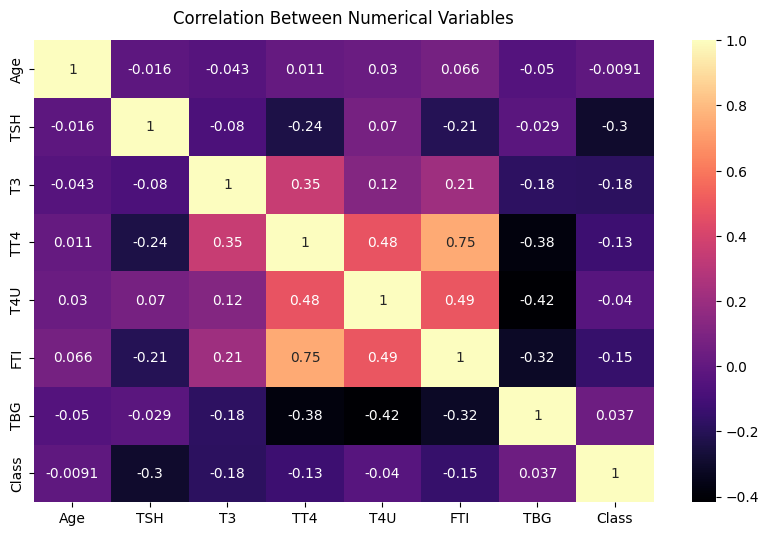

In [35]:
# Plotting heatmap to understand the relation between numerical variables
plt.figure(figsize = (10, 6))
fig1 = sns.heatmap(thyroid_data.corr(),annot = True, cmap = 'magma')
fig1.set_title('Correlation Between Numerical Variables', fontdict = {'fontsize': 12}, pad = 12)

In [36]:
# Understanding the distribution of classes
counter = Counter(thyroid_data['Class'])

for k, v in counter.items():
  print('Class = {}, n = {}'.format(k, v))

Class = 2, n = 6767
Class = 1, n = 593
Class = 0, n = 182


In [37]:
# Displaying distribution of classes
fig = px.bar(x = counter.keys(), y = counter.values())

fig.update_layout(
    title = 'Class Distribution',
    xaxis_title = 'Classes',
    yaxis_title = 'Count', 
    height = 500, 
    width = 600
)

fig.show()

In [38]:
# Using box plots to show the distribution of values for all numerical variables 
fig3 = make_subplots(rows = 2, cols = 4)
fig3.add_trace(
    go.Box(y = thyroid_data['Age'], name = 'Age'),
    row = 1, 
    col = 1
)
fig3.add_trace(
    go.Box(y = thyroid_data['TSH'], name = 'TSH'),
    row = 1, 
    col = 2
)
fig3.add_trace(
    go.Box(y = thyroid_data['T3'], name = 'T3'),
    row = 1, 
    col = 3
)
fig3.add_trace(
    go.Box(y = thyroid_data['TT4'], name = 'TT4'),
    row = 1, 
    col = 4
)
fig3.add_trace(
    go.Box(y = thyroid_data['T4U'], name = 'T4U'),
    row = 2, 
    col = 1
)
fig3.add_trace(
    go.Box(y = thyroid_data['FTI'], name = 'FTI'),
    row = 2, 
    col = 2
)
fig3.add_trace(
    go.Box(y = thyroid_data['TBG'], name = 'TBG'),
    row = 2, 
    col = 3, 
)
fig3.update_layout(height = 800, 
                  width = 1000, 
                  title_text = 'Distribution of Numerical Variables', 
                  title_x = 0.5)
fig3.show()

In [39]:
thyroid_data.head()

,Age,Sex,On_Thyroxine,Query_On_Thyroxine,On_Antithyroid_Medication,Sick,Pregnant,Thyroid_Surgery,I131_Treatment,Query_Hypothyroid,...,T3,TT4_Measured,TT4,T4U_Measured,T4U,FTI_Measured,FTI,TBG_Measured,TBG,Class
0,29,F,f,f,f,f,f,f,f,t,...,0.0,f,0.0,f,0.0,f,0.0,f,0.0,2
1,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128.0,f,0.0,f,0.0,f,0.0,2
2,41,F,f,f,f,f,f,f,f,f,...,0.0,f,0.0,f,0.0,f,0.0,t,11.0,2
3,36,F,f,f,f,f,f,f,f,f,...,0.0,f,0.0,f,0.0,f,0.0,t,26.0,2
5,60,F,f,f,f,f,f,f,f,f,...,0.0,f,0.0,f,0.0,f,0.0,t,26.0,2


In [40]:
# What percentage of males/females are affected by thyroid disorders in this dataset? Do these values align with the number of males/females affected by thyroid problems worldwide?
df1 = thyroid_data[thyroid_data['Class'].isin([0, 1])]
df1 = df1.groupby(['Class', 'Sex'])['Sex'].count().reset_index(name = 'Count')

# Mapping label encoded values to actual class values for pie chart labeling
mapping = {0: 'Hyperthyroid', 1: 'Hypothyroid'}
df1['Class'] = df1['Class'].replace(mapping)

fig = px.pie(df1, values = 'Count', names = 'Sex', hole = 0.3)
fig.update_layout(title = '% of Males Vs. Females Affected by Thyroid Disorders')
fig.show()

### Model Exploration & Selection

#### Feature Selection & Data Splitting

In [41]:
# Performing feature selection to get the most optimal features for our model
rf = RandomForestClassifier()
hyper_rf = rf.fit(processed_df, thyroid_data['Class'])
imp = hyper_rf.feature_importances_
sorted_features = sorted(zip(imp, processed_df), reverse=True)

features = []
for importance, feature in sorted_features[:6]:
  features.append(feature)
  print("{}: {}".format(feature, importance))

TSH: 0.5763323005012321
FTI: 0.10985044524127083
TT4: 0.10901560600161643
T3: 0.06753269308898792
T4U: 0.03485316169250359
Age: 0.022296489263361353


With the help of random forest classifier for getting the importance of features in our dataset, we were able to conclude that TSH, TT4, FTI, T3, T4U, Age, On_Thyroxine_f, Query_Hyperthyroid, T4U_Measured_t, TSH_Measured_t are the ten most important features. 

In [42]:
# Based on feature selection results, keeping top 10 most important features
X = processed_df.loc[:, processed_df.columns.isin(features)]
y = thyroid_data['Class']

In [43]:
# Splitting data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1) 

#### K-Nearest Neighbors

In [44]:
# Implementing KNN with grid search cv  
param_grid = {'n_neighbors': range(1, 11)}

knn = KNeighborsClassifier()
knn_gridsearch = GridSearchCV(knn, param_grid, cv = 5)
knn_gridsearch.fit(X_train, y_train)
y_pred1 = knn_gridsearch.predict(X_test)

# Evaluating model performance 
knn_acc = accuracy_score(y_test, y_pred1)
knn_pre = precision_score(y_test, y_pred1, average = 'weighted')
knn_rec = recall_score(y_test, y_pred1, average = 'weighted')
knn_f1 = f1_score(y_test, y_pred1, average = 'weighted')

print('Accuracy: ', knn_acc)
print('Precision: ', knn_pre)
print('Recall: ', knn_rec)
print('F1 Score: ', knn_f1)

Accuracy:  0.9448568398727466
Precision:  0.9458184095343478
Recall:  0.9448568398727466
F1 Score:  0.9395889470499865


#### Support Vector Machine


In [45]:
# Define the hyperparameter grid for tuning
param_grid = {'C': [0.1, 1, 10],  # Values for the regularization parameter C
              'kernel': ['linear', 'rbf'],  # Kernels to try: linear and radial basis function (RBF)
              'gamma': ['scale', 'auto'] + [0.1, 1, 10]}  # Values for the gamma parameter

# Create an instance of SVM classifier
svm = SVC()

# Create GridSearchCV with SVM classifier and the hyperparameter grid
grid_search = GridSearchCV(svm, param_grid, cv=5)  # Use 5-fold cross-validation

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
best_C = best_params['C']
best_kernel = best_params['kernel']
best_gamma = best_params['gamma']

# Create a new instance of SVM classifier with the best hyperparameters
best_svm = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma)

# Fit the best SVM classifier to the training data
best_svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred2 = best_svm.predict(X_test)

# Computing the accuracy of the classifier
svm_acc = accuracy_score(y_test, y_pred2)
svm_pre = precision_score(y_test, y_pred2, average = 'weighted')
svm_rec = recall_score(y_test, y_pred2, average = 'weighted')
svm_f1 = f1_score(y_test, y_pred2, average = 'weighted')

print('Accuracy: ', svm_acc)
print('Precision: ', svm_pre)
print('Recall: ', svm_rec)
print('F1 Score: ', svm_f1)

Accuracy:  0.9734888653234358
Precision:  0.9739263893700045
Recall:  0.9734888653234358
F1 Score:  0.9734978902347312


#### Decision Trees

In [46]:
# Instantiating Decision Trees object
dt = DecisionTreeClassifier()

# Defining hyperparameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing grid search with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Extracting best parameters and best model from grid search
best_params = grid_search.best_params_
best_dt = grid_search.best_estimator_

# Predicting new values for target class using best model
y_pred3 = best_dt.predict(X_test)

# Computing the accuracy of the classifier
dt_acc = accuracy_score(y_test, y_pred3)
dt_pre = precision_score(y_test, y_pred3, average='weighted')
dt_rec = recall_score(y_test, y_pred3, average='weighted')
dt_f1 = f1_score(y_test, y_pred3, average='weighted')

print('Best Parameters:', best_params)
print('Accuracy:', dt_acc)
print('Precision:', dt_pre)
print('Recall:', dt_rec)
print('F1 Score:', dt_f1)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9814422057264051
Precision: 0.982893934283357
Recall: 0.9814422057264051
F1 Score: 0.9820378064517467


#### Logistic Regression

In [47]:
# Instantiate logistic regression object
lr = LogisticRegression()

# Define hyperparameter grid for grid search
param_grid = {'penalty': ['l1', 'l2'], 
              'C': [0.01, 0.1, 1, 10, 100]}

# Perform grid search cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best hyperparameters and fit model with best hyperparameters
best_params = grid_search.best_params_
best_lr = LogisticRegression(penalty=best_params['penalty'], C=best_params['C'])
best_lr.fit(X_train, y_train)

# Predict on test set
y_pred4 = best_lr.predict(X_test)

# Compute accuracy, precision, recall, and F1 score
lr_acc = accuracy_score(y_test, y_pred4)
lr_pre = precision_score(y_test, y_pred4, average='weighted')
lr_rec = recall_score(y_test, y_pred4, average='weighted')
lr_f1 = f1_score(y_test, y_pred4, average='weighted')

print('Best Hyperparameters: ', best_params)
print('Accuracy: ', lr_acc)
print('Precision: ', lr_pre)
print('Recall: ', lr_rec)
print('F1 Score: ', lr_f1)

Best Hyperparameters:  {'C': 100, 'penalty': 'l2'}
Accuracy:  0.9655355249204666
Precision:  0.9639575466946768
Recall:  0.9655355249204666
F1 Score:  0.9638462360020006


#### Naive Bayes

In [48]:
# Instantiating naive bayes object
nb = GaussianNB()

# Training model with data for hyperthyroid
nb.fit(X_train, y_train)

# Predicting new values for hyperthyroid 
y_pred5 = nb.predict(X_test)

# Evaluating the classifier
nb_acc = accuracy_score(y_test, y_pred5)
nb_pre = precision_score(y_test, y_pred5, average = 'weighted')
nb_rec = recall_score(y_test, y_pred5, average = 'weighted')
nb_f1 = f1_score(y_test, y_pred5, average = 'weighted')

print('Accuracy: ', nb_acc)
print('Precision: ', nb_pre)
print('Recall: ', nb_rec)
print('F1 Score: ', nb_f1)

Accuracy:  0.957051961823966
Precision:  0.956060607919178
Recall:  0.957051961823966
F1 Score:  0.9551409817034863


#### Multi-layer Perceptron

In [49]:
# Define MLP Classifier
mlp = MLPClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'hidden_layer_sizes': [(64,), (32, 16,), (16, 8,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [32, 64],
    'max_iter': [100, 200],
    'random_state': [42]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the MLP Model with the best hyperparameters
best_mlp = MLPClassifier(**best_params)
best_mlp.fit(X_train, y_train)

# Evaluate the MLP Model
y_pred6 = best_mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred6)
precision = precision_score(y_test, y_pred6, average='weighted')
recall = recall_score(y_test, y_pred6, average='weighted')
f1 = f1_score(y_test, y_pred6, average='weighted')

print('Best Hyperparameters: ', best_params)
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1-score: ', f1)

Best Hyperparameters:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 32, 'hidden_layer_sizes': (32, 16), 'max_iter': 200, 'random_state': 42}
Accuracy:  0.9798515376458112
Precision:  0.9820133318465822
Recall:  0.9798515376458112
F1-score:  0.980645684591132


#### Model Performance

In [50]:
 # Summarizing model performance
algo = ['K-Nearest Neighbors', 'Support Vector Machine', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Multi-layer Perceptron']
acc = [knn_acc, svm_acc, dt_acc, lr_acc, nb_acc, accuracy]
pre = [knn_pre, svm_pre, dt_pre, lr_pre, nb_pre, precision]
rec = [knn_rec, svm_rec, dt_rec, lr_rec, nb_rec, recall]
f1_score = [knn_f1, svm_f1, dt_f1, lr_f1, nb_f1, f1]

val_dict = {'Algorithm': algo, 'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'F1 Score': f1_score}
val_df = pd.DataFrame(val_dict)
val_df

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,K-Nearest Neighbors,0.944857,0.945818,0.944857,0.939589
1,Support Vector Machine,0.973489,0.973926,0.973489,0.973498
2,Decision Trees,0.981442,0.982894,0.981442,0.982038
3,Logistic Regression,0.965536,0.963958,0.965536,0.963846
4,Naive Bayes,0.957052,0.956061,0.957052,0.955141
5,Multi-layer Perceptron,0.979852,0.982013,0.979852,0.980646
